In [3]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn import decomposition
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Homework: PCA 1
- Suppose you have a 10-dimensional dataset with 100 sample points. Denote it as 100x10 matrix X. Furter assume that X is normalized (sum of each column = 0)
- Suppose the X^T X has eigenvectors v1, v2, v3, ..., v10. Each eigenvector is of dimension 10.
- It has eigenvalues 10, 2, 1, 0.5, 0.3, 0.1, 0.05, 0.03, 0.02, 0.01
- PCA projects the 100x10 data matrix into 100xl matrix. If we want to get a PCA of the data that explains 90% of the variance, what is the smallest l?
- How to get the 100xl PCA matrix from X and the eigenvectors?

In [4]:
eigenv = np.array([10, 2, 1, 0.5, 0.3, 0.1, 0.05, 0.03, 0.02, 0.01])

In [9]:
var_explained = np.add.accumulate(eigenv) / eigenv.sum()

- PCA projects the 100x10 data matrix into 100xl matrix. If we want to get a PCA of the data that explains 90% of the variance, what is the smallest l?

In [15]:
l = [idx for idx, item in enumerate(var_explained) if item > 0.9][0] + 1

In [17]:
print('The smallest l is %d' % l)

The smallest l is 3


- How to get the 100xl PCA matrix from X and the eigenvectors?

In [45]:
print('We first construct a projection matrix P using the largest l eigenvectors, the 100xl PCA matrix = XP')

We first construct a projection matrix P using the largest l eigenvectors, the 100xl PCA matrix = XP


## Homework: PCA 2 

- Take around 100 sample digits from the mnist dataset which contains images from hand written digits
- Now apply PCA to reduce the data to 2D
- How much variance can the 2D PCA explain?
- Visualize the 2D data as a scatter plot, and annotate the dots using the digit label.

In [18]:
from sklearn import datasets
digits = datasets.load_digits()
n = digits.target.shape[0]
import random
random.seed(123)
indices = np.array(list(set([random.randint(0, n) for i in range(100)])))
labels = digits.target[indices]
data = digits.data[indices]

In [23]:
pca = decomposition.PCA(n_components=2)

In [27]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [28]:
data_2d = pca.transform(data)

In [34]:
print('%.4f variance can the 2D PCA explain' % pca.explained_variance_ratio_.sum())

0.2969 variance can the 2D PCA explain


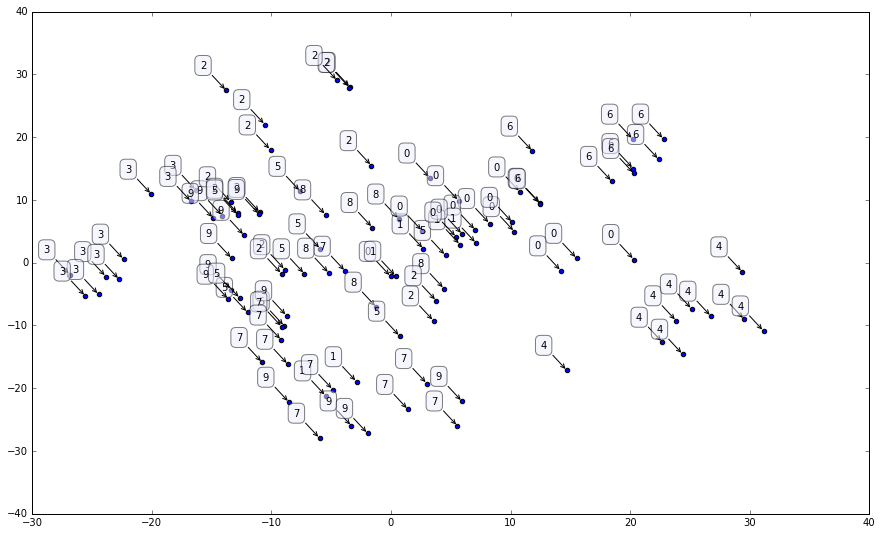

In [46]:
fig = plt.figure(figsize = (15,9))
plt.scatter(data_2d[:,0],data_2d[:,1])
for label, x, y in zip(labels, data_2d[:,0],data_2d[:,1]):
    plt.annotate(label, xy = (x, y), xytext = (-20, 20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    bbox = dict(boxstyle = 'round,pad=0.5', fc = '#eeeeff', alpha = 0.5), 
                 arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))